# Import Data

In [ ]:
!gdown 1RSqFrFeT4eZlQ71SnUnfL-F2fdAQgKsN

Downloading...
From: https://drive.google.com/uc?id=1RSqFrFeT4eZlQ71SnUnfL-F2fdAQgKsN
To: /content/AIDS_ClinicalTrial_GroupStudy175.csv
100% 147k/147k [00:00<00:00, 4.81MB/s]


# Import Modul

In [ ]:
!pip install lifelines

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes
from lifelines.statistics import logrank_test, multivariate_logrank_test
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


# Set style untuk plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Informasi Data

In [ ]:
# Load data
df = pd.read_csv('AIDS_ClinicalTrial_GroupStudy175.csv')
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,948,2,48,89.8128,0,0,0,100,0,0,1,0,0,0,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,1,895,0,0,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,1,707,0,1,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,1,1399,0,1,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,1,1352,0,1,1,3,0,0,0,504,353,870,782,0


In [ ]:
print(f"Shape dataset: {df.shape}")
print(f"Jumlah observasi: {df.shape[0]}")
print(f"Jumlah variabel: {df.shape[1]}")

Shape dataset: (2139, 24)
Jumlah observasi: 2139
Jumlah variabel: 24


In [ ]:
print("\nNama kolom:")
print(df.columns.tolist())


Nama kolom:
['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'label']


In [ ]:
print("\nInfo dataset:")
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21 

In [ ]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
              time          trt          age         wtkg         hemo  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177     1.520804    35.248247    75.125311     0.084151   
std     292.274324     1.127890     8.709026    13.263164     0.277680   
min      14.000000     0.000000    12.000000    31.000000     0.000000   
25%     727.000000     1.000000    29.000000    66.679200     0.000000   
50%     997.000000     2.000000    34.000000    74.390400     0.000000   
75%    1091.000000     3.000000    40.000000    82.555200     0.000000   
max    1231.000000     3.000000    70.000000   159.939360     1.000000   

              homo        drugs       karnof       oprior          z30  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean      0.661057     0.131370    95.446470     0.021973     0.550257   
std       0.473461     0.337883     5.900985     0.146629     0.497584   
min       0.00

# Pre-processing Data

## Missing Value

In [ ]:
missing_values = df.isnull().sum()
print(missing_values.to_frame().T)

   time  trt  age  wtkg  hemo  homo  drugs  karnof  oprior  z30  zprior  \
0     0    0    0     0     0     0      0       0       0    0       0   

   preanti  race  gender  str2  strat  symptom  treat  offtrt  cd40  cd420  \
0        0     0       0     0      0        0      0       0     0      0   

   cd80  cd820  label  
0     0      0      0  


## Data Duplikat

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


## Identifikasi Variabel Survival

In [ ]:
print("Variabel waktu survival: 'time'")
print("Variabel status event: 'label' (1=failure/death, 0=censoring)")

Variabel waktu survival: 'time'
Variabel status event: 'label' (1=failure/death, 0=censoring)


In [ ]:
print(f"\nRentang waktu survival: {df['time'].min()} - {df['time'].max()} hari")
print(f"Status event - Event (1): {(df['label'] == 1).sum()}")
print(f"Status event - Censored (0): {(df['label'] == 0).sum()}")
print(f"Censoring rate: {(df['label'] == 0).mean()*100:.2f}%")


Rentang waktu survival: 14 - 1231 hari
Status event - Event (1): 521
Status event - Censored (0): 1618
Censoring rate: 75.64%


## Kategorisasi Variabel

In [ ]:
categorical_vars = ['trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'zprior',
                   'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'label']
continuous_vars = ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

print("Variabel kategorik:", categorical_vars)
print("Variabel kontinu:", continuous_vars)

Variabel kategorik: ['trt', 'hemo', 'homo', 'drugs', 'oprior', 'z30', 'zprior', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'label']
Variabel kontinu: ['time', 'age', 'wtkg', 'karnof', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']


## Encoding Variabel Kategorik dengan Label yang Meaningful

In [ ]:
# Buat copy dataframe untuk preprocessing
df_processed = df.copy()

# Treatment labels
treatment_labels = {0: 'ZDV only', 1: 'ZDV + ddI', 2: 'ZDV + Zal', 3: 'ddI only'}
df_processed['trt_label'] = df_processed['trt'].map(treatment_labels)

# Binary variables dengan label yang jelas
binary_mappings = {
    'hemo': {0: 'No Hemophilia', 1: 'Hemophilia'},
    'homo': {0: 'No Homosexual Activity', 1: 'Homosexual Activity'},
    'drugs': {0: 'No IV Drug Use', 1: 'IV Drug Use History'},
    'race': {0: 'White', 1: 'Non-white'},
    'gender': {0: 'Female', 1: 'Male'},
    'symptom': {0: 'Asymptomatic', 1: 'Symptomatic'},
    'treat': {0: 'ZDV only', 1: 'Others'}
}

for var, mapping in binary_mappings.items():
    df_processed[f'{var}_label'] = df_processed[var].map(mapping)

# Stratification labels
strat_labels = {1: 'Antiretroviral Naive',
               2: '> 1 but <= 52 weeks prior therapy',
               3: '> 52 weeks prior therapy'}
df_processed['strat_label'] = df_processed['strat'].map(strat_labels)

print("✓ Variabel kategorik telah diberi label yang meaningful")

✓ Variabel kategorik telah diberi label yang meaningful


## Deteksi Outlier

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), (lower_bound, upper_bound)

outlier_summary = []
for var in continuous_vars:
    if var in df_processed.columns:
        n_outliers, bounds = detect_outliers_iqr(df_processed, var)
        outlier_summary.append({
            'Variable': var,
            'N_Outliers': n_outliers,
            'Outlier_Percentage': (n_outliers/len(df_processed))*100,
            'Bounds': bounds
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

  Variable  N_Outliers  Outlier_Percentage                         Bounds
0     time          49            2.290790                (181.0, 1637.0)
1      age          52            2.431043                   (12.5, 56.5)
2     wtkg          54            2.524544  (42.86519999999999, 106.3692)
3   karnof           9            0.420757                  (75.0, 115.0)
4  preanti          12            0.561010            (-1109.25, 1848.75)
5     cd40          31            1.449275                (24.25, 662.25)
6    cd420          30            1.402525                 (-17.5, 746.5)
7     cd80          71            3.319308               (-175.5, 2036.5)
8    cd820          59            2.758298               (-141.0, 1919.0)


# EXPLORATORY DATA ANALYSIS (EDA)

## Distribusi Waktu Survival

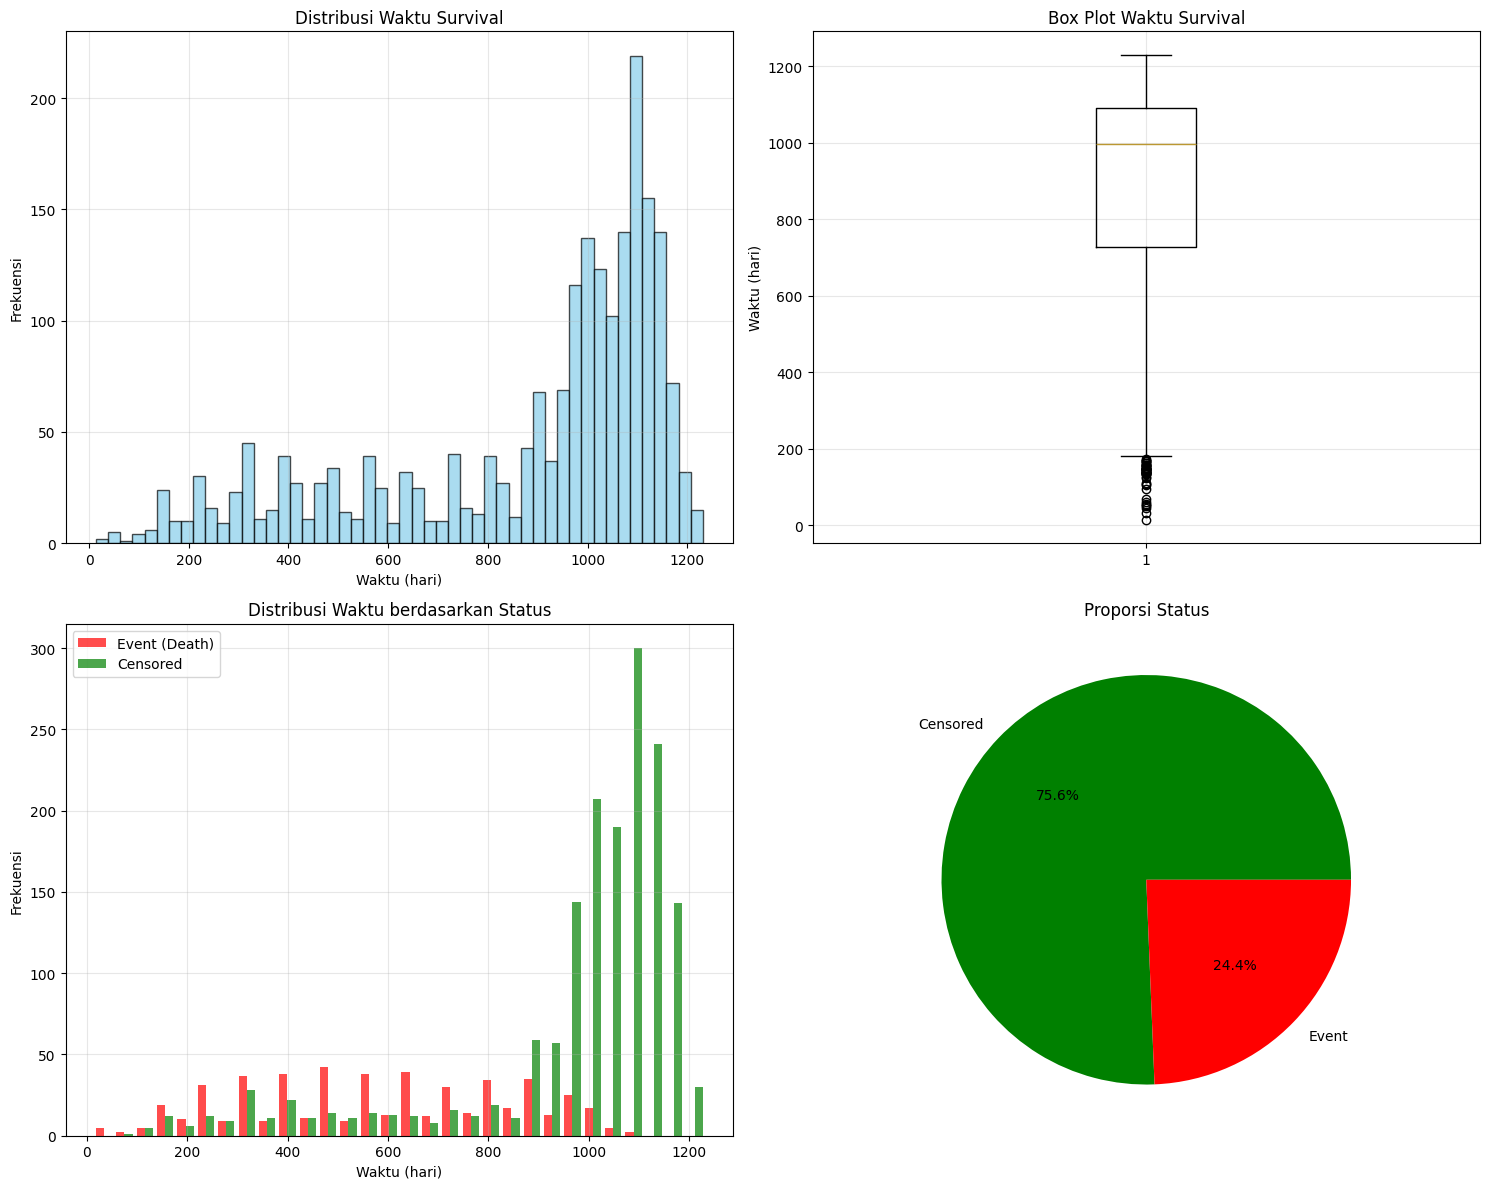


Statistik Waktu Survival:
Mean: 879.10 hari
Median: 997.00 hari
Min: 14 hari
Max: 1231 hari
Standard Deviation: 292.27 hari


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram waktu survival
axes[0,0].hist(df_processed['time'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribusi Waktu Survival')
axes[0,0].set_xlabel('Waktu (hari)')
axes[0,0].set_ylabel('Frekuensi')
axes[0,0].grid(True, alpha=0.3)

# Box plot waktu survival
axes[0,1].boxplot(df_processed['time'])
axes[0,1].set_title('Box Plot Waktu Survival')
axes[0,1].set_ylabel('Waktu (hari)')
axes[0,1].grid(True, alpha=0.3)

# Distribusi berdasarkan status event
event_data = df_processed[df_processed['label'] == 1]['time']
censored_data = df_processed[df_processed['label'] == 0]['time']

axes[1,0].hist([event_data, censored_data], bins=30, alpha=0.7,
              label=['Event (Death)', 'Censored'], color=['red', 'green'])
axes[1,0].set_title('Distribusi Waktu berdasarkan Status')
axes[1,0].set_xlabel('Waktu (hari)')
axes[1,0].set_ylabel('Frekuensi')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Survival status distribution
status_counts = df_processed['label'].value_counts()
axes[1,1].pie(status_counts.values, labels=['Censored', 'Event'], autopct='%1.1f%%',
             colors=['green', 'red'])
axes[1,1].set_title('Proporsi Status')

plt.tight_layout()
plt.show()

# Statistik deskriptif waktu survival
print(f"\nStatistik Waktu Survival:")
print(f"Mean: {df_processed['time'].mean():.2f} hari")
print(f"Median: {df_processed['time'].median():.2f} hari")
print(f"Min: {df_processed['time'].min()} hari")
print(f"Max: {df_processed['time'].max()} hari")
print(f"Standard Deviation: {df_processed['time'].std():.2f} hari")

## Analisis Censoring

In [ ]:
censoring_rate = (df_processed['label'] == 0).mean() * 100
event_rate = (df_processed['label'] == 1).mean() * 100

print(f"Event rate: {event_rate:.2f}% ({(df_processed['label'] == 1).sum()} observasi)")
print(f"Censoring rate: {censoring_rate:.2f}% ({(df_processed['label'] == 0).sum()} observasi)")

# Analisis censoring berdasarkan waktu
censoring_by_time = df_processed.groupby(pd.cut(df_processed['time'], bins=10))['label'].agg(['count', 'mean'])
print("\nCensoring rate berdasarkan interval waktu:")
print(censoring_by_time)

Event rate: 24.36% (521 observasi)
Censoring rate: 75.64% (1618 observasi)

Censoring rate berdasarkan interval waktu:
                  count      mean
time                             
(12.783, 135.7]      18  0.666667
(135.7, 257.4]       90  0.666667
(257.4, 379.1]      103  0.533981
(379.1, 500.8]      138  0.659420
(500.8, 622.5]       98  0.612245
(622.5, 744.2]      117  0.692308
(744.2, 865.9]      107  0.607477
(865.9, 987.6]      333  0.219219
(987.6, 1109.3]     721  0.033287
(1109.3, 1231.0]    414  0.000000


## Kaplan-Meier Survival Curve

### Overall

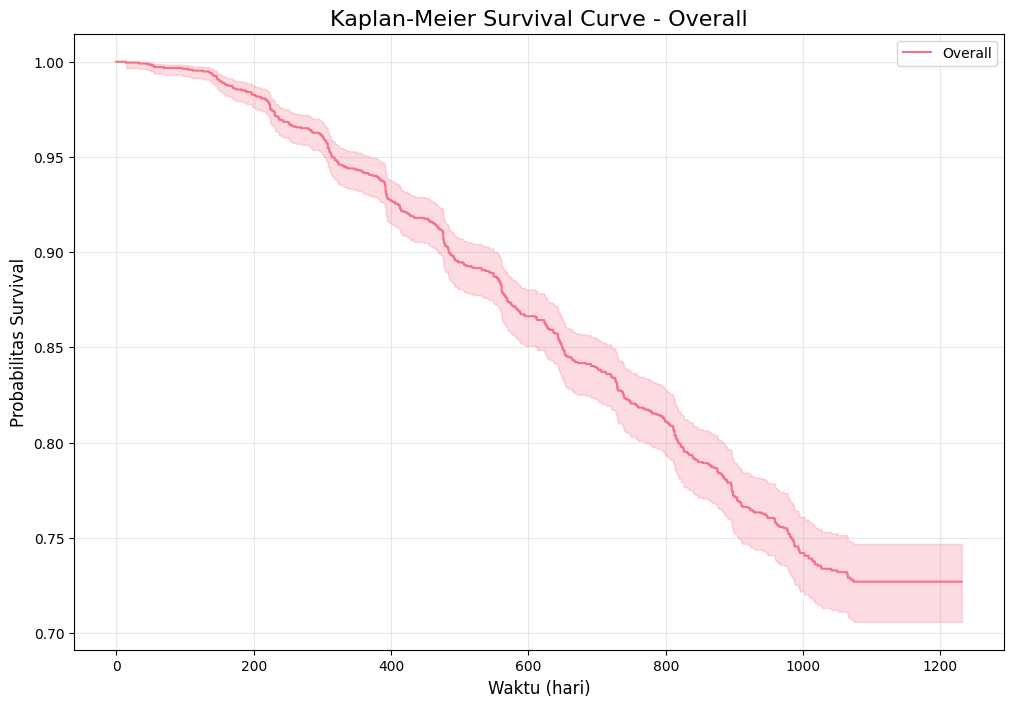

Median survival time: tidak tercapai (median survival > maksimum follow-up time)


In [ ]:
# Overall survival curve
kmf = KaplanMeierFitter()
kmf.fit(df_processed['time'], df_processed['label'], label='Overall')

plt.figure(figsize=(12, 8))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve - Overall', fontsize=16)
plt.xlabel('Waktu (hari)', fontsize=12)
plt.ylabel('Probabilitas Survival', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Median survival time - Fixed version
median_survival = kmf.median_survival_time_
if np.isfinite(median_survival):
    print(f"Median survival time: {median_survival:.2f} hari")
else:
    print("Median survival time: tidak tercapai (median survival > maksimum follow-up time)")

# Get confidence intervals - Fixed version
try:
    # Method 1: Try to get confidence intervals from survival function
    survival_df = kmf.survival_function_
    ci_lower = kmf.confidence_interval_survival_function_.iloc[:, 0]
    ci_upper = kmf.confidence_interval_survival_function_.iloc[:, 1]

    # Find median survival confidence interval
    median_idx = np.where(survival_df.values <= 0.5)[0]
    if len(median_idx) > 0:
        median_time_idx = median_idx[0]
        median_time = survival_df.index[median_time_idx]
        print(f"Approximate median survival time: {median_time:.2f} hari")

except AttributeError:
    print("Confidence intervals tidak tersedia dengan versi lifelines ini")

In [ ]:
def plot_stratified_survival_logrank_k(data, duration_col, event_col, strata_col, strata_labels=None, title=""):
    plt.figure(figsize=(12, 8))

    kmf = KaplanMeierFitter()
    unique_strata = sorted(data[strata_col].dropna().unique())

    for stratum in unique_strata:
        mask = data[strata_col] == stratum
        durations = data.loc[mask, duration_col]
        events = data.loc[mask, event_col]

        label = strata_labels[stratum] if strata_labels and stratum in strata_labels else f"{strata_col} = {stratum}"
        kmf.fit(durations, events, label=label)
        kmf.plot_survival_function(ci_show=True)

    plt.title(f'Kaplan-Meier Curves - {title}', fontsize=16)
    plt.xlabel('Waktu (hari)', fontsize=12)
    plt.ylabel('Probabilitas Survival', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Log-rank k sampel
    result = multivariate_logrank_test(
        event_durations=data[duration_col],
        groups=data[strata_col],
        event_observed=data[event_col]
    )

    print(f"Log-rank k sampel p-value: {result.p_value:.6f}")
    if result.p_value < 0.05:
        print("✓ Terdapat perbedaan survival yang signifikan antar kelompok (p < 0.05)")
    else:
        print("✗ Tidak terdapat perbedaan survival yang signifikan antar kelompok (p ≥ 0.05)")

### Treatment groups

A. Berdasarkan Treatment:


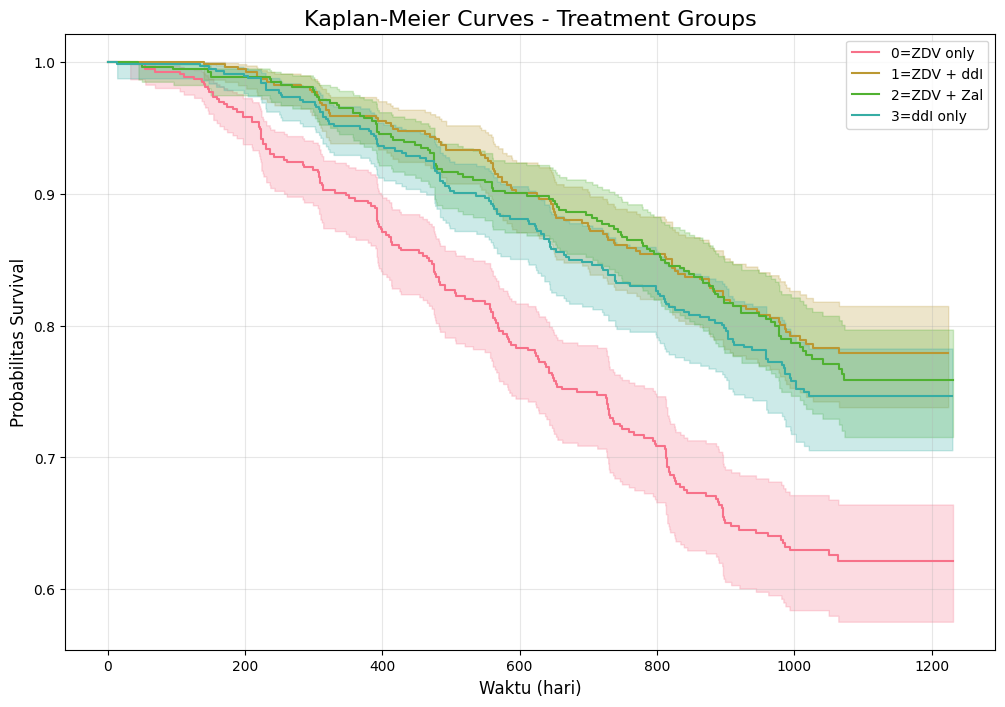

Log-rank k sampel p-value: 0.000000
✓ Terdapat perbedaan survival yang signifikan antar kelompok (p < 0.05)


In [ ]:
# Treatment groups
print("A. Berdasarkan Treatment:")
plot_stratified_survival_logrank_k(df_processed, 'time', 'label', 'trt',
                        {0: '0=ZDV only', 1: '1=ZDV + ddI', 2: '2=ZDV + Zal', 3: '3=ddI only'}, 'Treatment Groups')

### Gender


B. Berdasarkan Gender:


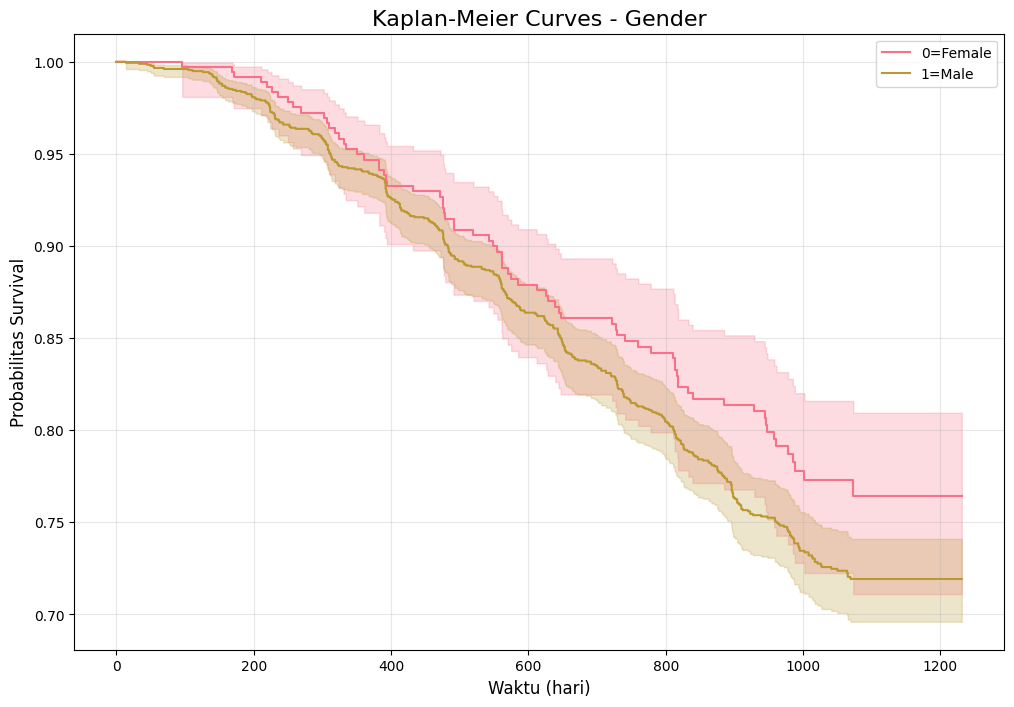

Log-rank k sampel p-value: 0.085650
✗ Tidak terdapat perbedaan survival yang signifikan antar kelompok (p ≥ 0.05)


In [ ]:
# Gender
print("\nB. Berdasarkan Gender:")
plot_stratified_survival_logrank_k(df_processed, 'time', 'label', 'gender',
                        {0: '0=Female', 1: '1=Male'}, 'Gender')

### Symptomatic status


C. Berdasarkan Symptomatic Status:


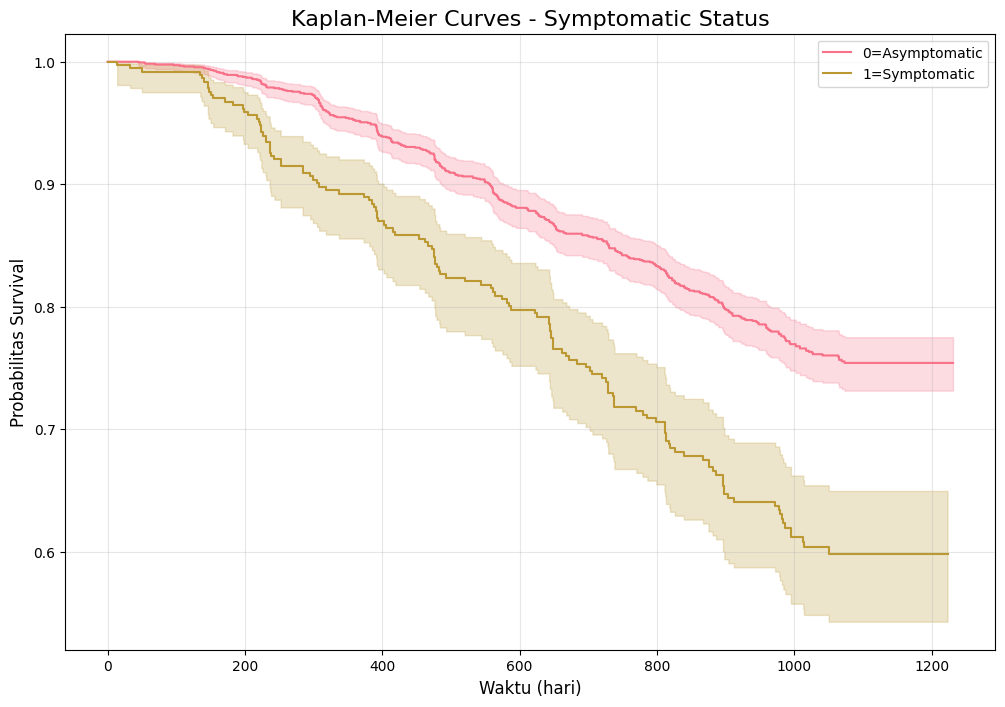

Log-rank k sampel p-value: 0.000000
✓ Terdapat perbedaan survival yang signifikan antar kelompok (p < 0.05)


In [ ]:
# Symptomatic status
print("\nC. Berdasarkan Symptomatic Status:")
plot_stratified_survival_logrank_k(df_processed, 'time', 'label', 'symptom',
                        {0: '0=Asymptomatic', 1: '1=Symptomatic'}, 'Symptomatic Status')

### Race


D. Berdasarkan Race:


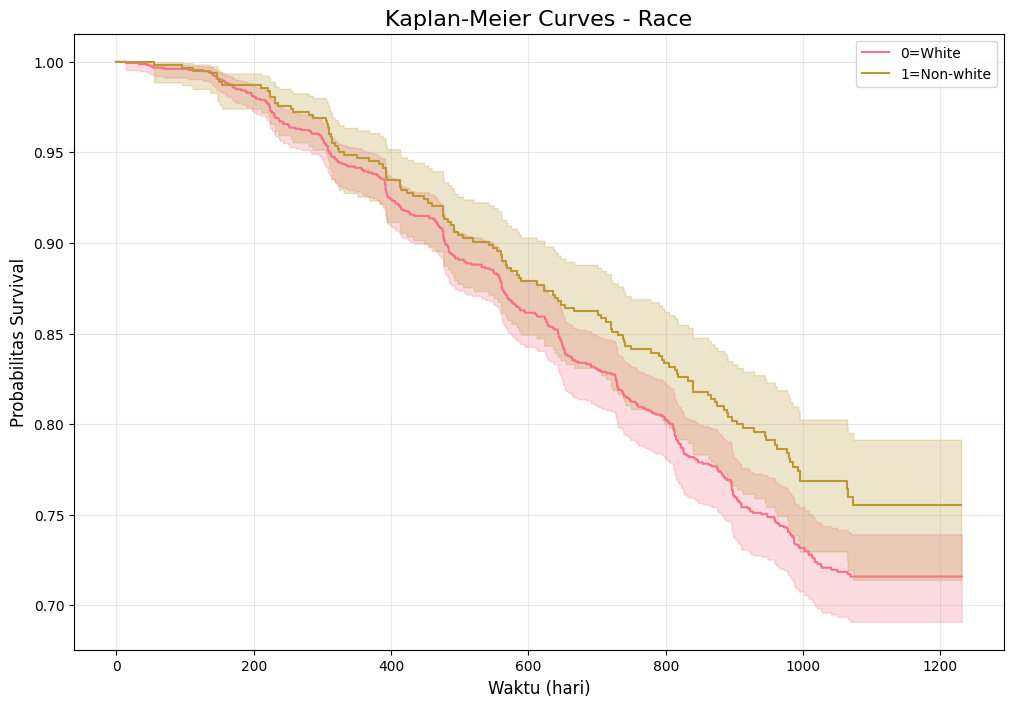

Log-rank k sampel p-value: 0.061879
✗ Tidak terdapat perbedaan survival yang signifikan antar kelompok (p ≥ 0.05)


In [ ]:
# Race
print("\nD. Berdasarkan Race:")
plot_stratified_survival_logrank_k(df_processed, 'time', 'label', 'race',
                        {0: '0=White', 1: '1=Non-white'}, 'Race')

## Analisis Kovariat Kontinu

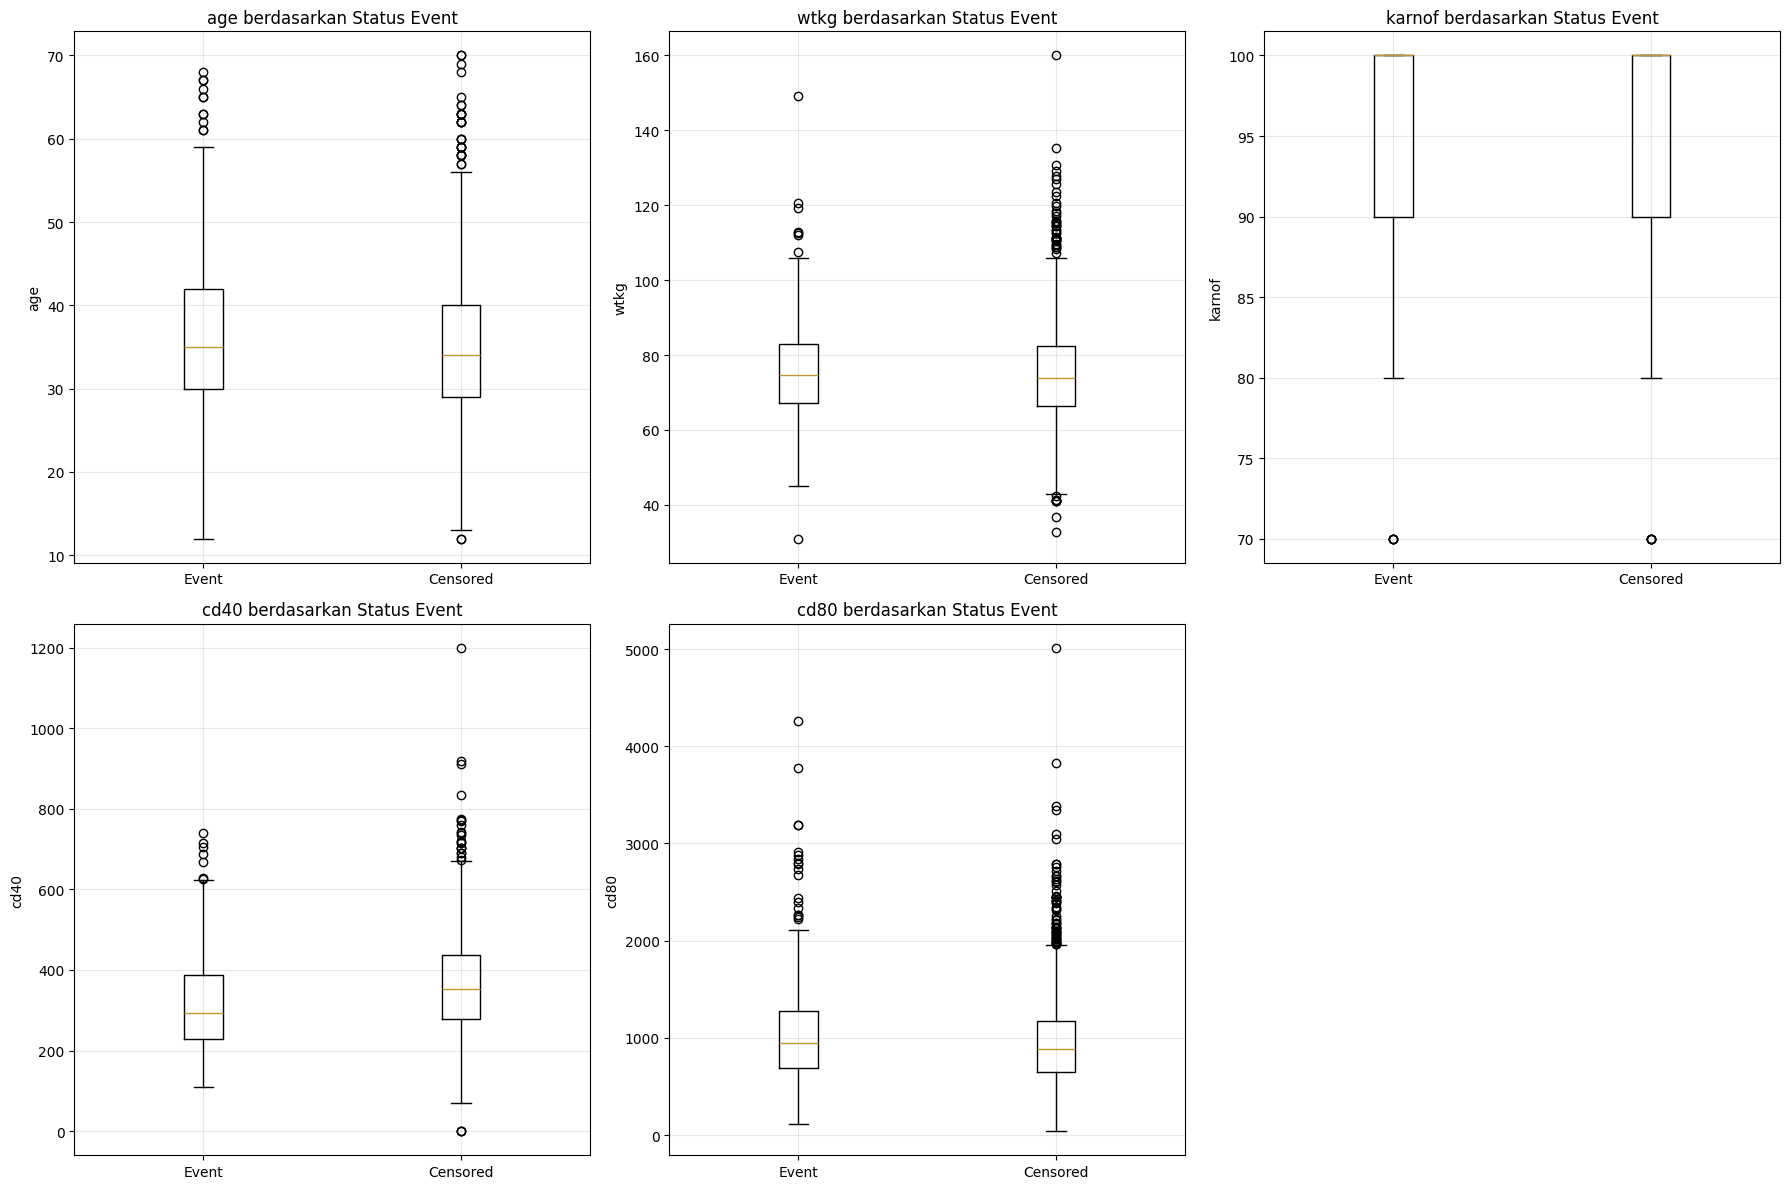

In [ ]:
# Analisis distribusi kovariat berdasarkan status event
continuous_vars_analysis = ['age', 'wtkg', 'karnof', 'cd40', 'cd80']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(continuous_vars_analysis):
    if var in df_processed.columns:
        # Box plot berdasarkan status event
        event_data = df_processed[df_processed['label'] == 1][var].dropna()
        censored_data = df_processed[df_processed['label'] == 0][var].dropna()

        axes[i].boxplot([event_data, censored_data], labels=['Event', 'Censored'])
        axes[i].set_title(f'{var} berdasarkan Status Event')
        axes[i].set_ylabel(var)
        axes[i].grid(True, alpha=0.3)

# Hide extra subplot
if len(continuous_vars_analysis) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Korelasi antar variabel kontinyu:


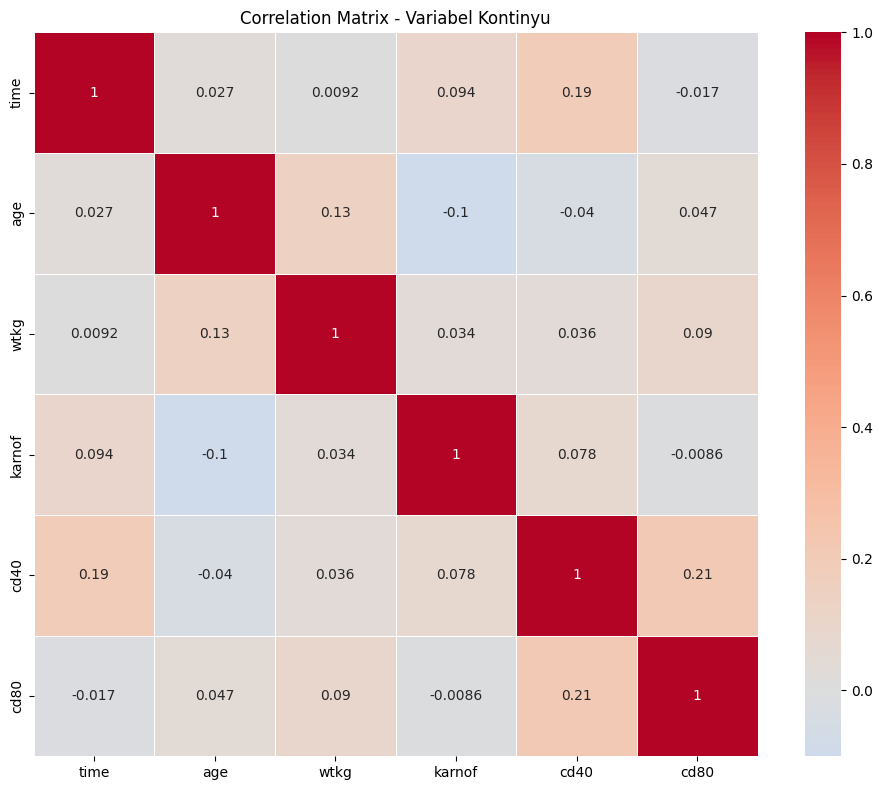

In [ ]:
# Korelasi antar variabel kontinyu
print("\nKorelasi antar variabel kontinyu:")
corr_vars = ['time', 'age', 'wtkg', 'karnof', 'cd40', 'cd80']
available_corr_vars = [var for var in corr_vars if var in df_processed.columns]
correlation_matrix = df_processed[available_corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title('Correlation Matrix - Variabel Kontinyu')
plt.tight_layout()
plt.show()